# Loading Data and Relative Libraries

In [1]:
import pandas as pd # Pandas DataFrame
import seaborn as sns # Data Visualization Tool
import numpy as np # Numpy
import matplotlib.pyplot as plt # Ploting Tool
import statsmodels.formula.api as smf # Statistic Analysis Tool
from pymongo.mongo_client import MongoClient # Mongo DB Client Connection Tool
import urllib.parse # Url String Parsing

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Connecting String for MongoDB Connector
username = urllib.parse.quote_plus('')
password = urllib.parse.quote_plus('')
uri = "mongodb+srv://" + username + ":" + password + "@127.0.0.1/?retryWrites=true&w=majority"

# Set client
client = MongoClient(uri)

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [2]:
# Check Database list
print(client.list_database_names())

['Team7', 'Team7_Practice', 'pokemon_Sanfran', 'sample_airbnb', 'sample_analytics', 'sample_geospatial', 'sample_guides', 'sample_mflix', 'sample_restaurants', 'sample_supplies', 'sample_training', 'sample_weatherdata', 'admin', 'local']


In [3]:
# Select Database
mydb = client.Team7

# Check Collection list in Selected Database
mydb.list_collection_names()

# Select Collection #IBM CASE
mycol = mydb.imb_case

# Get Pandas DataFrame from Mongo Collection
df = pd.DataFrame(list(mycol.find()))

In [4]:
# Check Pandas DATA FRAME Information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [5]:
# Check MongoDB DataFrame
df.head()

,_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,64b829bfb64986d9b3edcf5d,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,64b829bfb64986d9b3edcf5e,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,64b829bfb64986d9b3edcf5f,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,64b829bfb64986d9b3edcf60,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,64b829bfb64986d9b3edcf61,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Descriptive Statistics
## Via MongoDB 

In [6]:
# Descriptive Statistics (Numerical Variables) using aggregate Function with MongoDB QL
descriptive_statistics = mycol.aggregate([{
    "$group": {
        "_id": "$Attrition", # Attrition Status Yes / No
        "CNT": { # Count each Attrition Status
            "$count": {}
        }, "Avg_Age": { # Average Age between Yes and No
            "$avg": "$Age"
        }, "Avg_DistanceFromHome": { # Average Distance From Home
            "$avg": "$DistanceFromHome"
        }, "Avg_EnvironmentSatisfaction": { # Average Environment Satifaction Likert Scale
            "$avg": "$EnvironmentSatisfaction"
        }, "Avg_JobSatisfaction": { # Average Job Satisfaction Likert Scale
            "$avg": "$JobSatisfaction"
        }, "avg_MonthlyIncome":{ # Average Monthly Income in $
            "$avg": "$MonthlyIncome"
        }, "Avg_Monthly_rate": { # Average Monthly Rate
            "$avg": "$MonthlyRate"
        }, "Avg_NumCompaniesWorked": { # Average# of Companies worked
            "$avg": "$NumCompaniesWorked"
        }, "Avg_PercentSalaryHike": { # Average Percent Salary hike
            "$avg": "$PercentSalaryHike"
        }, "Avg_RelationshipSatisfaction": { # Average Relationship Satisfaction 
            "$avg": "$RelationshipSatisfaction"
        }, "Avg_StockOptionLevel": { # Average Stock Option Level. Looks binary 1: Yes, 0: No Stock Option
            "$avg": "$StockOptionLevel"
        }, "Avg_TotalWorkingYears": { # Average Total working years
            "$avg": "$TotalWorkingYears"
        }, "Avg_TrainingTimesLastYear": { # Average Training Times Last year
            "$avg": "$TrainingTimesLastYear"
        }, "Avg_WorkLifeBalance": { # Average Work Life Balance. TIME SPENT BEWTWEEN WORK AND OUTSIDE
            "$avg": "$WorkLifeBalance"
        }, "Avg_YearsAtCompany": { # Average Years at company
            "$avg": "$YearsAtCompany"
        }, "Avg_YearsInCurrentRole": { # Average Years in current role
            "$avg": "$YearsInCurrentRole"
        }, "Avg_YearsSinceLastPromotion": { # Average Years Since last promotion
            "$avg": "$YearsSinceLastPromotion"
        }, "Avg_YearsWithCurrManager": { # Average Years with current manager
            "$avg": "$YearsWithCurrManager"
        }
    }
}])
list(descriptive_statistics)
# DistanceFromHome RelationshipSatisfaction PercentSalaryHike EnvironmentSatisfaction 
# YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager

[{'_id': 'Yes',
  'CNT': 237,
  'Avg_Age': 33.607594936708864,
  'Avg_DistanceFromHome': 10.632911392405063,
  'Avg_EnvironmentSatisfaction': 2.4641350210970465,
  'Avg_JobSatisfaction': 2.4683544303797467,
  'avg_MonthlyIncome': 4787.0928270042195,
  'Avg_Monthly_rate': 14559.308016877638,
  'Avg_NumCompaniesWorked': 2.940928270042194,
  'Avg_PercentSalaryHike': 15.09704641350211,
  'Avg_RelationshipSatisfaction': 2.5991561181434597,
  'Avg_StockOptionLevel': 0.5274261603375527,
  'Avg_TotalWorkingYears': 8.244725738396625,
  'Avg_TrainingTimesLastYear': 2.6244725738396624,
  'Avg_WorkLifeBalance': 2.6582278481012658,
  'Avg_YearsAtCompany': 5.1308016877637135,
  'Avg_YearsInCurrentRole': 2.9029535864978904,
  'Avg_YearsSinceLastPromotion': 1.9451476793248945,
  'Avg_YearsWithCurrManager': 2.852320675105485},
 {'_id': 'No',
  'CNT': 1233,
  'Avg_Age': 37.561232765612324,
  'Avg_DistanceFromHome': 8.915652879156529,
  'Avg_EnvironmentSatisfaction': 2.7712895377128954,
  'Avg_JobSatisfa

In [7]:
# Categorical Variables Crosstabulation
# Gender pivoting
descriptive_gender = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$Gender"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_gender)

[{'_id': ['Yes', 'Male'], 'CNT': 150},
 {'_id': ['No', 'Male'], 'CNT': 732},
 {'_id': ['Yes', 'Female'], 'CNT': 87},
 {'_id': ['No', 'Female'], 'CNT': 501}]

In [8]:
# Categorical Variables Crosstabulation
# BusinessTravel pivoting
descriptive_BusinessTravel = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$BusinessTravel"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_BusinessTravel)

[{'_id': ['No', 'Travel_Frequently'], 'CNT': 208},
 {'_id': ['No', 'Non-Travel'], 'CNT': 138},
 {'_id': ['Yes', 'Travel_Frequently'], 'CNT': 69},
 {'_id': ['Yes', 'Non-Travel'], 'CNT': 12},
 {'_id': ['Yes', 'Travel_Rarely'], 'CNT': 156},
 {'_id': ['No', 'Travel_Rarely'], 'CNT': 887}]

In [9]:
# Categorical Variables Crosstabulation
# Department pivoting
descriptive_Department = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$Department"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_Department)

[{'_id': ['Yes', 'Sales'], 'CNT': 92},
 {'_id': ['No', 'Research & Development'], 'CNT': 828},
 {'_id': ['No', 'Human Resources'], 'CNT': 51},
 {'_id': ['Yes', 'Human Resources'], 'CNT': 12},
 {'_id': ['Yes', 'Research & Development'], 'CNT': 133},
 {'_id': ['No', 'Sales'], 'CNT': 354}]

In [10]:
# Categorical Variables Crosstabulation
# Education pivoting
descriptive_Education = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$Education"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_Education)

[{'_id': ['Yes', 4], 'CNT': 58},
 {'_id': ['No', 5], 'CNT': 43},
 {'_id': ['Yes', 5], 'CNT': 5},
 {'_id': ['Yes', 3], 'CNT': 99},
 {'_id': ['No', 2], 'CNT': 238},
 {'_id': ['No', 1], 'CNT': 139},
 {'_id': ['No', 3], 'CNT': 473},
 {'_id': ['Yes', 2], 'CNT': 44},
 {'_id': ['No', 4], 'CNT': 340},
 {'_id': ['Yes', 1], 'CNT': 31}]

In [11]:
# Categorical Variables Crosstabulation
# JobInvolvement pivoting
descriptive_JobInvolvement = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$JobInvolvement"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_JobInvolvement)

[{'_id': ['Yes', 2], 'CNT': 71},
 {'_id': ['Yes', 3], 'CNT': 125},
 {'_id': ['No', 2], 'CNT': 304},
 {'_id': ['No', 3], 'CNT': 743},
 {'_id': ['No', 1], 'CNT': 55},
 {'_id': ['Yes', 4], 'CNT': 13},
 {'_id': ['No', 4], 'CNT': 131},
 {'_id': ['Yes', 1], 'CNT': 28}]

In [12]:
# Categorical Variables Crosstabulation
# EducationField pivoting
descriptive_EducationField = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$EducationField"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_EducationField)

[{'_id': ['Yes', 'Human Resources'], 'CNT': 7},
 {'_id': ['Yes', 'Other'], 'CNT': 11},
 {'_id': ['No', 'Other'], 'CNT': 71},
 {'_id': ['No', 'Human Resources'], 'CNT': 20},
 {'_id': ['No', 'Medical'], 'CNT': 401},
 {'_id': ['No', 'Marketing'], 'CNT': 124},
 {'_id': ['No', 'Life Sciences'], 'CNT': 517},
 {'_id': ['Yes', 'Life Sciences'], 'CNT': 89},
 {'_id': ['Yes', 'Medical'], 'CNT': 63},
 {'_id': ['Yes', 'Marketing'], 'CNT': 35},
 {'_id': ['Yes', 'Technical Degree'], 'CNT': 32},
 {'_id': ['No', 'Technical Degree'], 'CNT': 100}]

In [13]:
# Categorical Variables Crosstabulation
# JobRole pivoting
descriptive_JobRole = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$JobRole"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_JobRole)

[{'_id': ['No', 'Research Director'], 'CNT': 78},
 {'_id': ['Yes', 'Human Resources'], 'CNT': 12},
 {'_id': ['No', 'Manufacturing Director'], 'CNT': 135},
 {'_id': ['Yes', 'Sales Executive'], 'CNT': 57},
 {'_id': ['No', 'Human Resources'], 'CNT': 40},
 {'_id': ['Yes', 'Healthcare Representative'], 'CNT': 9},
 {'_id': ['Yes', 'Research Director'], 'CNT': 2},
 {'_id': ['No', 'Sales Executive'], 'CNT': 269},
 {'_id': ['Yes', 'Laboratory Technician'], 'CNT': 62},
 {'_id': ['No', 'Laboratory Technician'], 'CNT': 197},
 {'_id': ['No', 'Research Scientist'], 'CNT': 245},
 {'_id': ['Yes', 'Manufacturing Director'], 'CNT': 10},
 {'_id': ['No', 'Healthcare Representative'], 'CNT': 122},
 {'_id': ['No', 'Manager'], 'CNT': 97},
 {'_id': ['Yes', 'Sales Representative'], 'CNT': 33},
 {'_id': ['No', 'Sales Representative'], 'CNT': 50},
 {'_id': ['Yes', 'Manager'], 'CNT': 5},
 {'_id': ['Yes', 'Research Scientist'], 'CNT': 47}]

In [14]:
# Categorical Variables Crosstabulation
# MaritalStatus pivoting
descriptive_MaritalStatus = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$MaritalStatus"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_MaritalStatus)

[{'_id': ['Yes', 'Single'], 'CNT': 120},
 {'_id': ['No', 'Single'], 'CNT': 350},
 {'_id': ['No', 'Married'], 'CNT': 589},
 {'_id': ['Yes', 'Divorced'], 'CNT': 33},
 {'_id': ['No', 'Divorced'], 'CNT': 294},
 {'_id': ['Yes', 'Married'], 'CNT': 84}]

In [15]:
# Categorical Variables Crosstabulation
# Over18 pivoting
descriptive_Over18 = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$Over18"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_Over18)

[{'_id': ['No', 'Y'], 'CNT': 1233}, {'_id': ['Yes', 'Y'], 'CNT': 237}]

In [16]:
# Categorical Variables Crosstabulation
# OverTime pivoting
descriptive_OverTime = mycol.aggregate([{
    "$group": {
        "_id": ["$Attrition", "$OverTime"],
        "CNT": {
            "$count": {}
        }
    }
}])
list(descriptive_OverTime)

[{'_id': ['Yes', 'No'], 'CNT': 110},
 {'_id': ['No', 'No'], 'CNT': 944},
 {'_id': ['No', 'Yes'], 'CNT': 289},
 {'_id': ['Yes', 'Yes'], 'CNT': 127}]

## Descriptive Statistics with Panadas

In [17]:
# Descriptive statistics with pandas Numerical variables
df.groupby('Attrition').agg(['mean', 'count']).round(decimals=2)

C:\Users\yunsi\AppData\Local\Temp\ipykernel_3092\1780835660.py:2: FutureWarning: ['_id', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Attrition').agg(['mean', 'count']).round(decimals=2)


Age       DailyRate       DistanceFromHome       Education       EmployeeCount       EmployeeNumber       EnvironmentSatisfaction       HourlyRate       JobInvolvement       JobLevel       JobSatisfaction       MonthlyIncome       MonthlyRate       NumCompaniesWorked       PercentSalaryHike       PerformanceRating       RelationshipSatisfaction       StandardHours       StockOptionLevel       TotalWorkingYears       TrainingTimesLastYear       WorkLifeBalance       YearsAtCompany       YearsInCurrentRole       YearsSinceLastPromotion       YearsWithCurrManager      
            mean count      mean count             mean count      mean count          mean count           mean count                    mean count       mean count           mean count     mean count            mean count          mean count        mean count               mean count              mean count              mean count                     mean count          mean count             mean count              mean count                  mean count            mean count           mean count               mean count                    mean count                 mean count
Attrition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
No         37.56  1233    812.50  1233             8.92  1233      2.93  1233           1.0  1233        1027.66  1233                    2.77  1233      65.95  1233           2.77  1233     2.15  1233            2.78  1233       6832.74  1233    14265.78  1233               2.65  1233             15.23  1233              3.15  1233                     2.73  1233          80.0  1233             0.85  1233             11.86  1233                  2.83  1233            2.78  1233           7.37  1233               4.48  1233                    2.23  1233                 4.37  1233
Yes        33.61   237    750.36   237            10.63   237      2.84   237           1.0   237        1010.35   237                    2.46   237      65.57   237           2.52   237     1.64   237            2.47   237       4787.09   237    14559.31   237               2.94   237             15.10   237              3.16   237                     2.60   237          80.0   237             0.53   237              8.24   237                  2.62   237            2.66   237           5.13   237               2.90   237                    1.95   237                 2.85   237

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


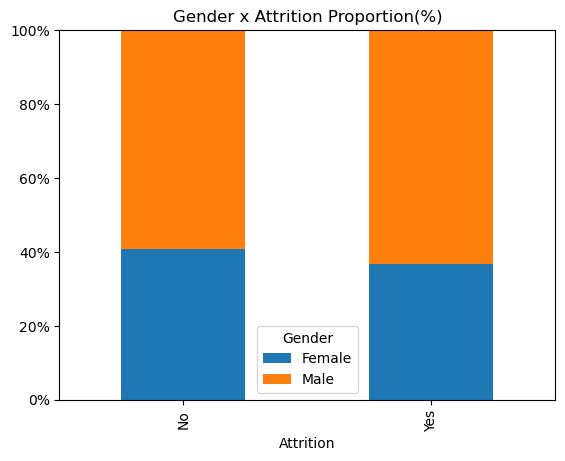

In [18]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'Gender'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


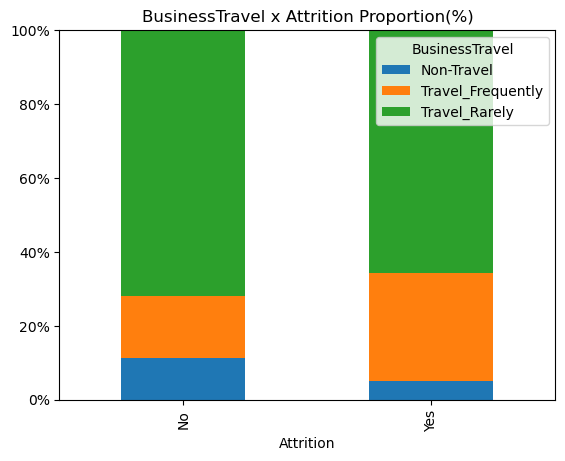

In [19]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'BusinessTravel'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


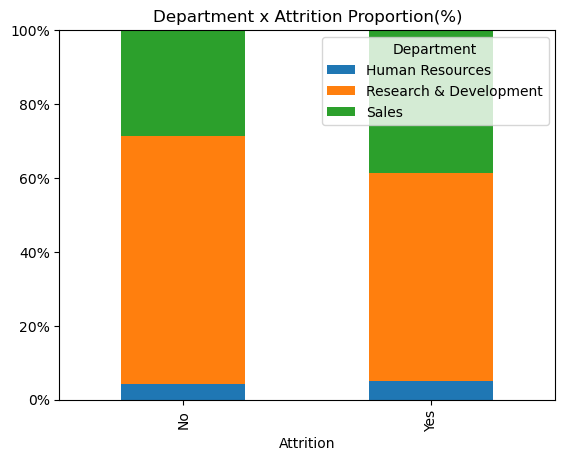

In [20]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'Department'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


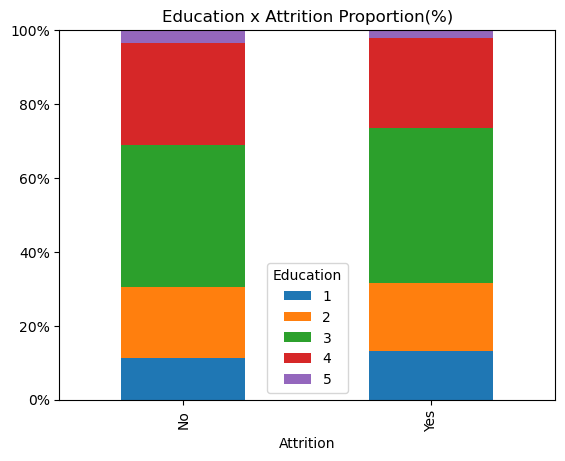

In [21]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'Education'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


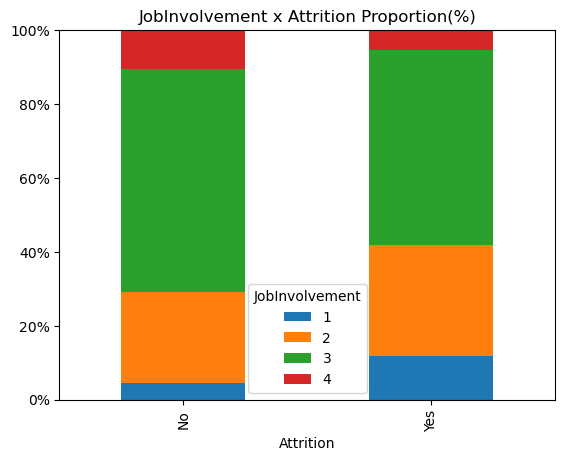

In [22]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'JobInvolvement'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


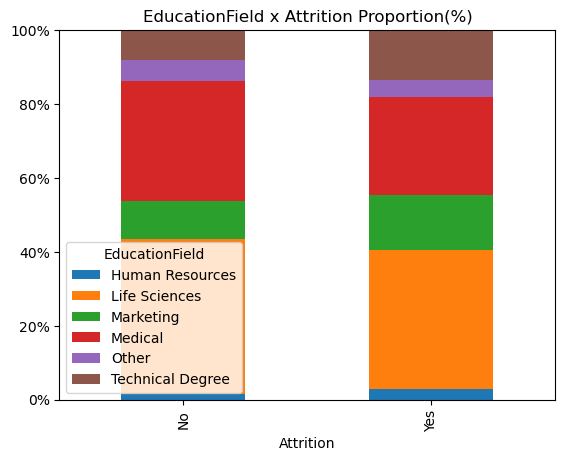

In [23]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'EducationField'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


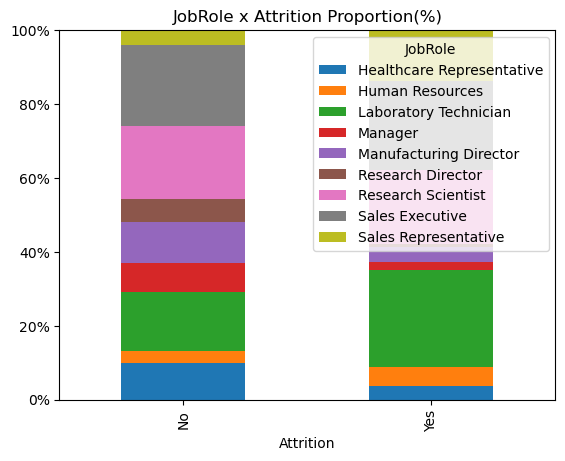

In [24]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'JobRole'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


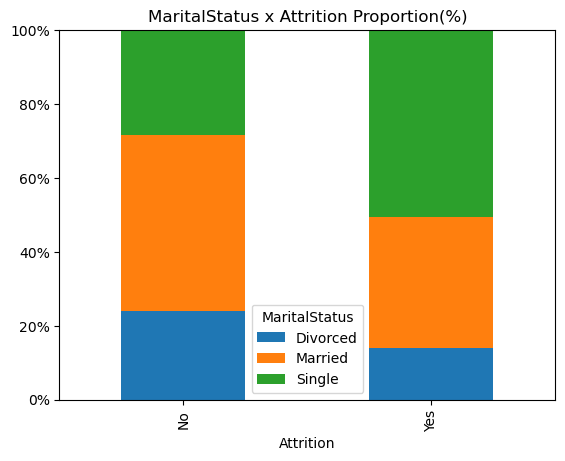

In [25]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'MaritalStatus'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
Over18,,
Y,1233,237


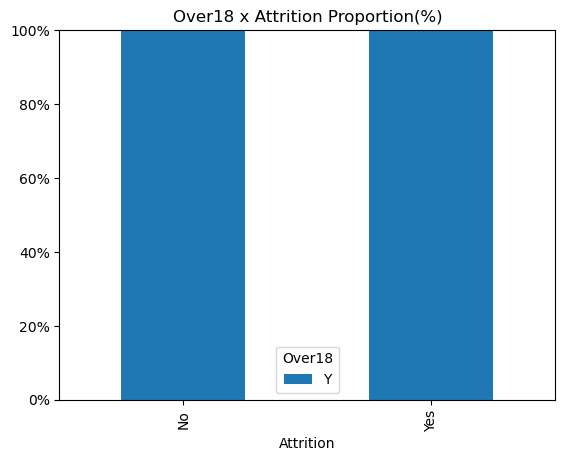

In [26]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'Over18'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


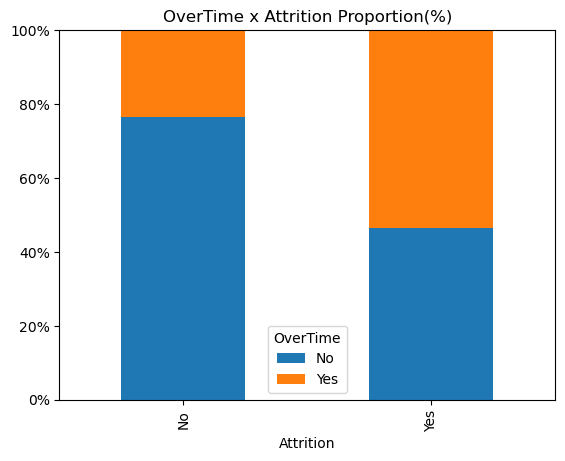

In [27]:
# Categorical Variables Crosstabulation in Pandas
# Visualize stacked percentage bar chart
col = 'OverTime'
display(pd.crosstab(
    columns=df['Attrition'], 
    index=df[col]
))
pd.crosstab(
    index=df['Attrition'], 
    columns=df[col],
    normalize='index'
).plot(kind='bar', stacked=True,
      title=col + " x Attrition Proportion(%)")
plt.ylim(0,1)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.show()

# Adding and Modifying Variables

In [28]:
# Conditional Syntax: Building Dummy Variables from categorical variables
added_df = mycol.aggregate([{
    "$addFields": {
        "Attrition_YN": { # Dependent Variable
            "$switch": {
                "branches": [
                    {"case": {"$eq": ["$Attrition", "Yes"]}, "then": 1},
                    {"case": {"$eq": ["$Attrition", "No"]}, "then": 0}
                ], "default": 99
            }
        }, "Male": { # Gender Dummy Variable: Base = Female
            "$switch": {
                "branches":[
                    {"case": {"$eq": ["$Gender", "Male"]}, "then": 1},
                ], "default": 0
            }
        }, "Travel_Frequently": { # BusinessTravel Dummy Variable. Only focused on Travel Frequently 
            "$switch": {
                "branches":[
                    {"case": {"$eq": ["$BusinessTravel", "Travel_Frequently"]}, "then": 1}
                ], "default": 0
            }
        }, "Sales_Department": { # Department Dummy Variable. Only Sales_Department
            "$switch": {
                "branches":[
                    {"case": {"$eq": ["$Department", "Sales"]}, "then": 1}
                ], "default": 0
            }
        }, "Single": { # MaritalStatus Dummy Variable. Only single
            "$switch": {
                "branches":[
                    {"case": {"$eq": ["$MaritalStatus", "Single"]}, "then": 1}
                ], "default": 0
            }
        }, "OverTime_Y": { # OverTime Binary Dummy. Over Time Yes.
            "$switch": {
                "branches":[
                    {"case": {"$eq": ["$OverTime", "Yes"]}, "then": 1}
                ], "default": 0
            }
        }
    }
}])

In [29]:
# Stored and reshape data frame with added dummy variables
df = pd.DataFrame(list(added_df))
df.head()

,_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_YN,Male,Travel_Frequently,Sales_Department,Single,OverTime_Y
0,64b829bfb64986d9b3edcf5d,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0,0,1,1,1
1,64b829bfb64986d9b3edcf5e,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,1,0,0,0
2,64b829bfb64986d9b3edcf5f,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,1,0,0,1,1
3,64b829bfb64986d9b3edcf60,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1,0,0,1
4,64b829bfb64986d9b3edcf61,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0


In [30]:
# Store final dataset as csv file
df.to_csv('./IBM_final_df.csv')

# Analyzing variables with dependent variables

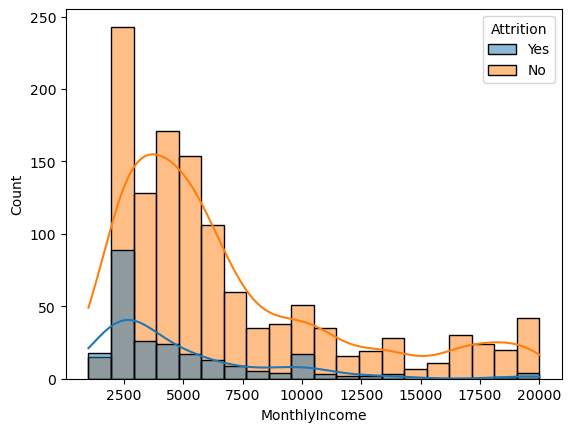

In [31]:
# Check Distribution between Monthly Income and Attrition
sns.histplot(data=df, x='MonthlyIncome', kde=True, hue='Attrition')
plt.show()

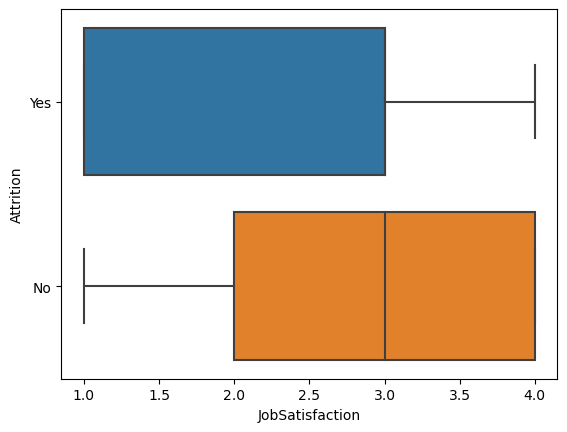

In [32]:
# Check Distribution between Job Satisfaction and Attrition
sns.boxplot(data=df, x='JobSatisfaction', y='Attrition')
plt.show()

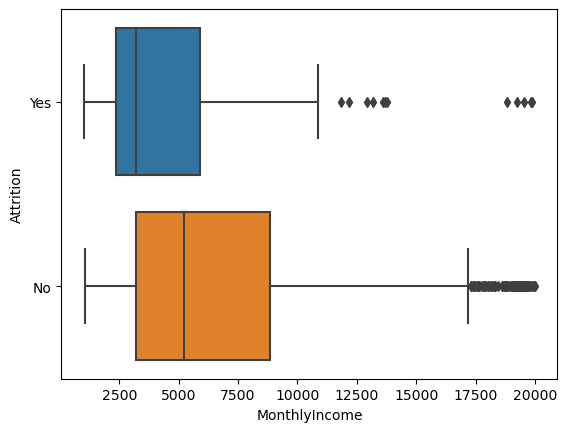

In [33]:
sns.boxplot(data=df, x='MonthlyIncome', y='Attrition')
plt.show()

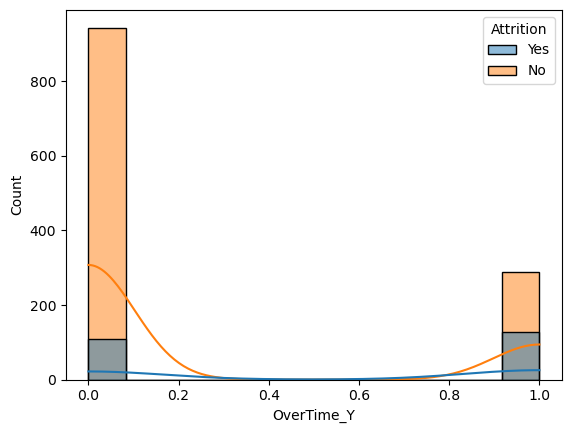

In [34]:
sns.histplot(data=df, hue='Attrition', x='OverTime_Y', kde=True)
plt.show()

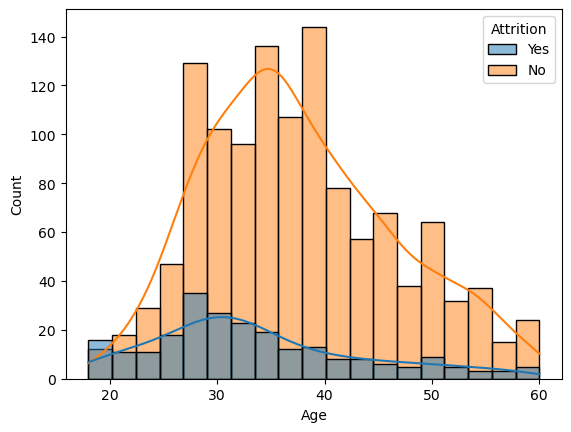

In [35]:
sns.histplot(data=df, hue='Attrition', x='Age', kde=True)
plt.show()

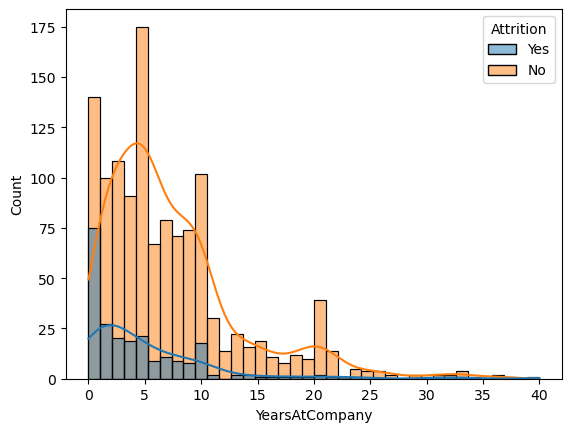

In [36]:
sns.histplot(data=df, hue='Attrition', x='YearsAtCompany', kde=True)
plt.show()

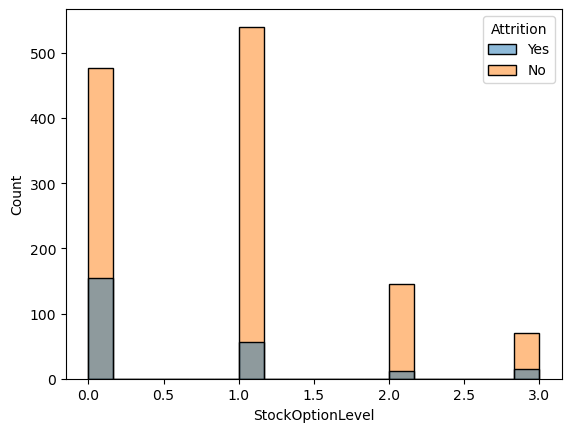

In [37]:
sns.histplot(data=df, hue='Attrition', x='StockOptionLevel')
plt.show()

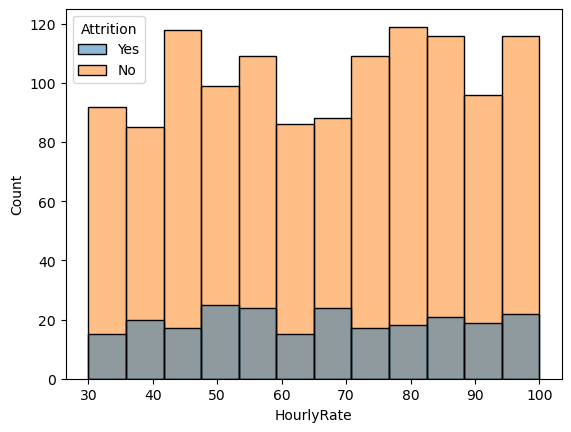

In [38]:
sns.histplot(data=df, hue='Attrition', x='HourlyRate')
plt.show()

In [39]:
# Correlation Test with Total variables
cor_test = df[[
    # Dependent Variable
    'Attrition_YN', 
    
    # Independent Numerical
    'Age', 
    'DistanceFromHome', 
    'EnvironmentSatisfaction', 
    'JobSatisfaction',
    'MonthlyIncome', 
    'MonthlyRate', 
    'NumCompaniesWorked', 
    'PercentSalaryHike', 
    'PerformanceRating', 
    'RelationshipSatisfaction', 
    'StockOptionLevel', 
    'TotalWorkingYears', 
    'TrainingTimesLastYear', 
    'WorkLifeBalance', 
    'YearsAtCompany', 
    'YearsInCurrentRole', 
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 
    
    # Dummy Variable
    'Male', 
    'Travel_Frequently', 
    'Sales_Department', 
    'Single', 
    'OverTime_Y'
   ]].corr().round(decimals=3)

In [40]:
# Correlation Coefficients
display(cor_test[['Attrition_YN']].sort_values(by='Attrition_YN', ascending=False))

,Attrition_YN
Attrition_YN,1.000
OverTime_Y,0.246
Single,0.175
Travel_Frequently,0.115
Sales_Department,0.081
DistanceFromHome,0.078
NumCompaniesWorked,0.043
Male,0.029
MonthlyRate,0.015
PerformanceRating,0.003


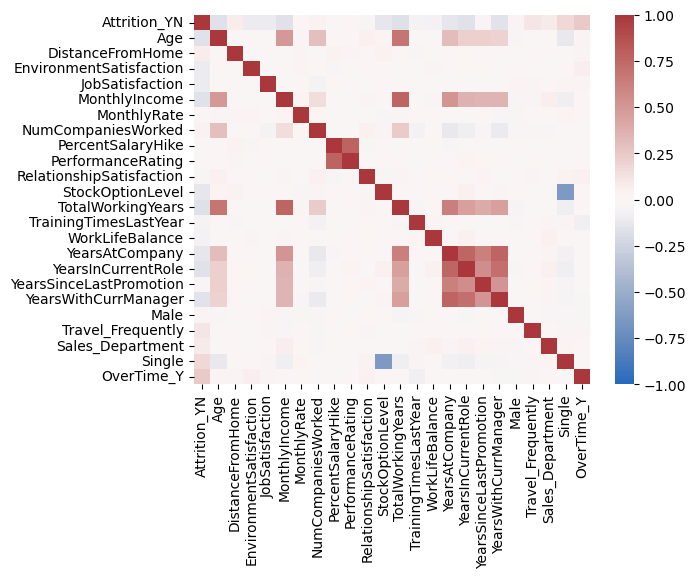

In [41]:
# Check Heatmap
sns.heatmap(data=cor_test, annot=False, vmax=1, vmin=-1, cmap='vlag')
plt.show()

# Building Logistic Regression Model

In [42]:
# Full Model Formula Text
fml = ''
for x in cor_test.columns:
    if x == 'Attrition_YN':
        fml += x + ' ~ '
    else:
        fml += x + ' + '
fml = fml[0:-3]

In [43]:
fml

'Attrition_YN ~ Age + DistanceFromHome + EnvironmentSatisfaction + JobSatisfaction + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager + Male + Travel_Frequently + Sales_Department + Single + OverTime_Y'

In [44]:
# Building Full Model
model = smf.logit(data=df, formula=fml)
res = model.fit()

res.summary2()

Optimization terminated successfully.
         Current function value: 0.317495
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.281     
Dependent Variable:    Attrition_YN       AIC:                981.4343  
Date:                  2023-07-28 15:25   BIC:                1108.4667 
No. Observations:      1470               Log-Likelihood:     -466.72   
Df Model:              23                 LL-Null:            -649.29   
Df Residuals:          1446               LLR p-value:        2.5362e-63
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                 2.2922   1.1086  2.0676 0.0387  0.1193  4.4651
Age                      -0.0339   0.0129 -2.6236 0.0087 -0.0593 -0.0086
DistanceFromHome          0.0380   0.0101  3.7444 0.0002  0.0181  0.0579
EnvironmentSatisfaction  -0.4105   0.0784 -5.2386 0.0000 -0.5640 -0.2569
JobSatisfaction          -0.4125   0.0775 -5.3241 0.0000 -0.5644 -0.2607
MonthlyIncome            -0.0001   0.0000 -3.0749 0.0021 -0.0002 -0.0000
MonthlyRate               0.0000   0.0000  0.3113 0.7556 -0.0000  0.0000
NumCompaniesWorked        0.1752   0.0362  4.8407 0.0000  0.1042  0.2461
PercentSalaryHike        -0.0350   0.0367 -0.9540 0.3401 -0.1070  0.0369
PerformanceRating         0.2264   0.3756  0.6026 0.5467 -0.5098  0.9625
RelationshipSatisfaction -0.2654   0.0782 -3.3922 0.0007 -0.4187 -0.1120
StockOptionLevel         -0.2478   0.1405 -1.7635 0.0778 -0.5233  0.0276
TotalWorkingYears        -0.0535   0.0271 -1.9738 0.0484 -0.1066 -0.0004
TrainingTimesLastYear    -0.1528   0.0684 -2.2344 0.0255 -0.2869 -0.0188
WorkLifeBalance          -0.3116   0.1162 -2.6824 0.0073 -0.5393 -0.0839
YearsAtCompany            0.0910   0.0366  2.4862 0.0129  0.0193  0.1627
YearsInCurrentRole       -0.1329   0.0431 -3.0862 0.0020 -0.2173 -0.0485
YearsSinceLastPromotion   0.1774   0.0403  4.3970 0.0000  0.0983  0.2565
YearsWithCurrManager     -0.1588   0.0446 -3.5612 0.0004 -0.2462 -0.0714
Male                      0.4068   0.1754  2.3196 0.0204  0.0631  0.7505
Travel_Frequently         0.9284   0.1978  4.6930 0.0000  0.5407  1.3162
Sales_Department          0.7264   0.1822  3.9866 0.0001  0.3693  1.0835
Single                    0.8300   0.2313  3.5877 0.0003  0.3766  1.2835
OverTime_Y                1.7846   0.1797  9.9316 0.0000  1.4324  2.1368
========================================================================

"""

In [45]:
# Fit Model using Significant Variables
fml2 = ''
for x in cor_test.drop([
    'PercentSalaryHike', 
    'TotalWorkingYears', 
    'YearsAtCompany',
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 
    'PerformanceRating',
    'MonthlyRate',
], axis=1).columns:
    if x == 'Attrition_YN':
        fml2 += x + ' ~ '
    else:
        fml2 += x + ' + '
fml2 = fml2[0:-3]

In [46]:
fml2

'Attrition_YN ~ Age + DistanceFromHome + EnvironmentSatisfaction + JobSatisfaction + MonthlyIncome + NumCompaniesWorked + RelationshipSatisfaction + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + Male + Travel_Frequently + Sales_Department + Single + OverTime_Y'

In [47]:
model2 = smf.logit(data=df, formula=fml2)
res = model2.fit()

# Final Model 
res.summary2()

Optimization terminated successfully.
         Current function value: 0.331214
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.250     
Dependent Variable:    Attrition_YN       AIC:                1007.7700 
Date:                  2023-07-28 15:25   BIC:                1097.7513 
No. Observations:      1470               Log-Likelihood:     -486.89   
Df Model:              16                 LL-Null:            -649.29   
Df Residuals:          1453               LLR p-value:        1.8140e-59
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                 2.2186   0.6452  3.4388 0.0006  0.9541  3.4831
Age                      -0.0409   0.0113 -3.6310 0.0003 -0.0630 -0.0188
DistanceFromHome          0.0363   0.0099  3.6564 0.0003  0.0168  0.0557
EnvironmentSatisfaction  -0.3545   0.0754 -4.7020 0.0000 -0.5023 -0.2067
JobSatisfaction          -0.3740   0.0744 -5.0284 0.0000 -0.5197 -0.2282
MonthlyIncome            -0.0001   0.0000 -3.6660 0.0002 -0.0002 -0.0000
NumCompaniesWorked        0.1391   0.0339  4.1027 0.0000  0.0726  0.2055
RelationshipSatisfaction -0.2290   0.0761 -3.0104 0.0026 -0.3781 -0.0799
StockOptionLevel         -0.2593   0.1381 -1.8770 0.0605 -0.5300  0.0115
TrainingTimesLastYear    -0.1352   0.0673 -2.0076 0.0447 -0.2671 -0.0032
WorkLifeBalance          -0.2972   0.1137 -2.6136 0.0090 -0.5201 -0.0743
YearsInCurrentRole       -0.0901   0.0293 -3.0795 0.0021 -0.1474 -0.0327
Male                      0.3872   0.1715  2.2582 0.0239  0.0511  0.7233
Travel_Frequently         0.9226   0.1918  4.8103 0.0000  0.5467  1.2986
Sales_Department          0.7185   0.1760  4.0813 0.0000  0.3734  1.0635
Single                    0.7258   0.2263  3.2076 0.0013  0.2823  1.1694
OverTime_Y                1.7231   0.1742  9.8941 0.0000  1.3817  2.0644
========================================================================

"""

In [54]:
np.exp(1.7231)

5.601867363924198

In [48]:
# Odds Ratio Calculate
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
display(np.exp(conf))

,5%,95%,Odds Ratio
Intercept,2.596366,32.560823,9.194553
Age,0.938971,0.981355,0.959929
DistanceFromHome,1.016974,1.057307,1.036945
EnvironmentSatisfaction,0.605139,0.813228,0.701510
JobSatisfaction,0.594678,0.795960,0.687997
MonthlyIncome,0.999836,0.999950,0.999893
NumCompaniesWorked,1.075329,1.228129,1.149192
RelationshipSatisfaction,0.685153,0.923199,0.795319
StockOptionLevel,0.588590,1.011523,0.771604
TrainingTimesLastYear,0.765561,0.996799,0.873562


In [57]:
or_tbl = np.exp(conf)

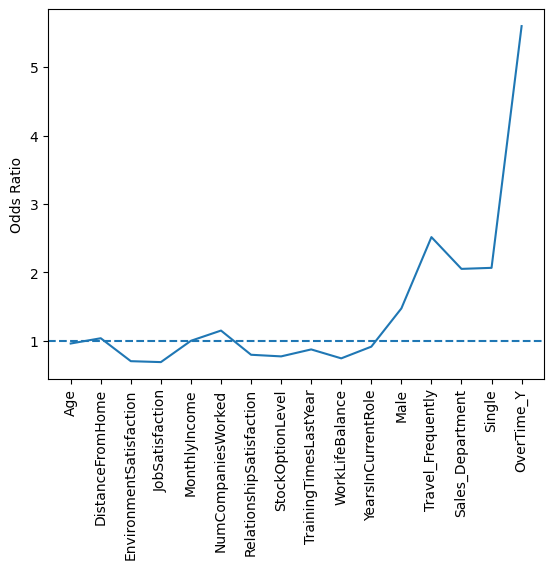

In [58]:
# Odds Ratio Visualization
g = sns.lineplot(data=or_tbl.iloc[1:]['Odds Ratio'], )
g.tick_params(axis='x', rotation=90)
g.axhline(y=1.0,linestyle='--')
plt.show()

In [51]:
# Single, Far from home, Not satisfied, Male, lower trained last year, No Stock Option, New in current role. 

In [52]:
# Final_DataFrame for PySpark ML
final_df = df[cor_test.drop([
    'PercentSalaryHike', 
    'TotalWorkingYears', 
    'YearsAtCompany',
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 
    'PerformanceRating',
    'MonthlyRate',
], axis=1).columns]

In [53]:
final_df.head()

,Attrition_YN,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,Male,Travel_Frequently,Sales_Department,Single,OverTime_Y
0,1,41,1,2,4,5993,8,1,0,0,1,4,0,0,1,1,1
1,0,49,8,3,2,5130,1,4,1,3,3,7,1,1,0,0,0
2,1,37,2,4,3,2090,6,2,0,3,3,0,1,0,0,1,1
3,0,33,3,4,3,2909,1,3,0,3,3,7,0,1,0,0,1
4,0,27,2,1,2,3468,9,4,1,3,3,2,1,0,0,0,0


# Building Logistic Regression ML Molder by PySpark

## Local PySpark Environt Connection

In [54]:
import findspark
findspark.init()
import pyspark
print(pyspark.__version__)

3.2.4


In [55]:
import os
import sys
import pyspark

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

from pyspark.sql import SparkSession

#Create PySpark SparkSession
spark = SparkSession.builder.getOrCreate()

In [56]:
final_df.columns.to_list()

['Attrition_YN',
 'Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'Male',
 'Travel_Frequently',
 'Sales_Department',
 'Single',
 'OverTime_Y']

## Check Spark SQL Dataset

In [57]:
#Create PySpark DataFrame from Pandas
sdf=spark.createDataFrame(final_df) 
sdf.printSchema()
sdf.show()

root
 |-- Attrition_YN: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- DistanceFromHome: long (nullable = true)
 |-- EnvironmentSatisfaction: long (nullable = true)
 |-- JobSatisfaction: long (nullable = true)
 |-- MonthlyIncome: long (nullable = true)
 |-- NumCompaniesWorked: long (nullable = true)
 |-- RelationshipSatisfaction: long (nullable = true)
 |-- StockOptionLevel: long (nullable = true)
 |-- TrainingTimesLastYear: long (nullable = true)
 |-- WorkLifeBalance: long (nullable = true)
 |-- YearsInCurrentRole: long (nullable = true)
 |-- Male: long (nullable = true)
 |-- Travel_Frequently: long (nullable = true)
 |-- Sales_Department: long (nullable = true)
 |-- Single: long (nullable = true)
 |-- OverTime_Y: long (nullable = true)

+------------+---+----------------+-----------------------+---------------+-------------+------------------+------------------------+----------------+---------------------+---------------+------------------+----+-----------------+-------

## Loading Packages

In [58]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.evaluation import *
from pyspark.sql import SQLContext

In [59]:
# Define Independence Variables
X = final_df.drop('Attrition_YN', axis=1).columns.to_list()

In [60]:
#creating vectors with names of variables
vecAssembler = VectorAssembler(inputCols = X, outputCol="features")
v_df = vecAssembler.transform(sdf)
vhouse_df = v_df.select(['features', 'Attrition_YN'])
vhouse_df = vhouse_df.withColumnRenamed("Attrition_YN", "label")# We have to rename our output variable to 'label'

In [61]:
#splitting the dataset
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [62]:
#creating an object with the logistic regression engine
lr = LogisticRegression(maxIter=20)
pipeline = Pipeline(stages=[lr])

#fitting the model
model = lr.fit(train_df)

#evaluating the model using testing data
result = model.transform(test_df)
result.prediction
result.show()

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
AUC_ROC = evaluator.evaluate(result,{evaluator.metricName: "areaUnderROC"})
print('AUC ROC:' + str(AUC_ROC))

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[21.0,15.0,3.0,4....|    0|[2.22238727705011...|[0.90224195918370...|       0.0|
|[22.0,16.0,4.0,4....|    0|[0.76690200417478...|[0.68285035432987...|       0.0|
|[25.0,5.0,3.0,3.0...|    1|[0.05654537701286...|[0.51413257885218...|       0.0|
|[26.0,25.0,1.0,3....|    1|[-0.0909739928018...|[0.47727217476763...|       1.0|
|[26.0,25.0,3.0,3....|    0|[3.49295601077996...|[0.97048668057318...|       0.0|
|[27.0,3.0,3.0,3.0...|    0|[1.14018640348821...|[0.75771386126462...|       0.0|
|[27.0,8.0,4.0,3.0...|    0|[1.76706698842093...|[0.85409254311301...|       0.0|
|[27.0,17.0,3.0,2....|    0|[0.69969733343730...|[0.66812066367926...|       0.0|
|[28.0,4.0,2.0,3.0...|    0|[2.03048868689699...|[0.88396121380267...|       0.0|
|[30.0,4.0,3.0,2

In [63]:
from pyspark.sql import SQLContext
from pyspark.ml.evaluation import BinaryClassificationEvaluator

sc = pyspark.SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(result)

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(train_df)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test_df)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

print('Model Intercept: ', cvModel.bestModel.intercept)
weights = cvModel.bestModel.coefficients
weights = [(float(w),) for w in weights]  # convert numpy type to float, and to tuple
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
weightsDF.show()
# View best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "features")
selected.show()

C:\spark\spark-3.2.4-bin-hadoop3.2\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Model Intercept:  1.9440393360818446
+--------------------+
|      Feature Weight|
+--------------------+
|-0.04555366450736304|
|  0.0355247341444389|
|-0.30007170235261854|
| -0.2706539123283441|
|-1.05493160252003...|
| 0.11922538576812579|
| -0.2400115579365764|
| -0.3237987268898899|
|-0.15034821637827098|
|-0.22944891711968177|
|-0.07788009830084043|
|  0.4804470713478083|
|  0.8195152384967666|
|  0.6447783409180743|
|  0.5021143297961203|
|  1.5423164290454945|
+--------------------+

+-----+----------+--------------------+--------------------+
|label|prediction|         probability|            features|
+-----+----------+--------------------+--------------------+
|    0|       0.0|[0.88505646431041...|[21.0,15.0,3.0,4....|
|    0|       0.0|[0.69582529061080...|[22.0,16.0,4.0,4....|
|    1|       0.0|[0.53909210245531...|[25.0,5.0,3.0,3.0...|
|    1|       0.0|[0.52098990603993...|[26.0,25.0,1.0,3....|
|    0|       0.0|[0.96172556558205...|[26.0,25.0,3.0,3....|
|    0|       

In [64]:
best_fitted_AUC = evaluator.evaluate(predictions,{evaluator.metricName: "areaUnderROC"})

In [65]:
print('AUC ROC:' + str(round(best_fitted_AUC, 3)))

AUC ROC:0.808


In [66]:
pred_result = pd.DataFrame(predictions.toPandas())[['label', 'prediction']]

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = pred_result['label'], y_pred=pred_result['prediction'])


True Negatives : 359
False Positives: 3
False Negatives: 70
True Positives : 19



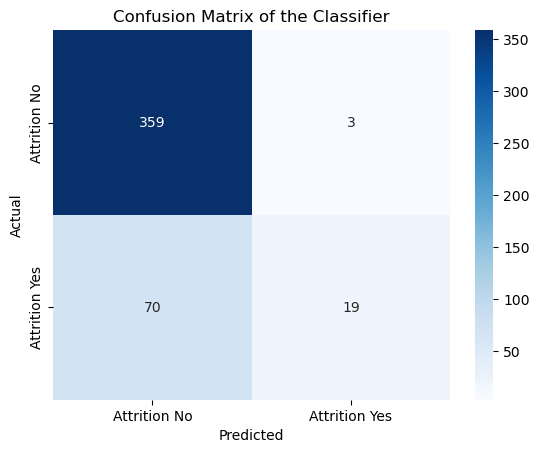

In [68]:
model_tn, \
model_fp, \
model_fn, \
model_tp = cm.ravel()

print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

# heatmap
sns.heatmap(cm,
            annot       = True,
            xticklabels = ['Attrition No', 'Attrition Yes'],
            yticklabels = ['Attrition No', 'Attrition Yes'],
            cmap        = 'Blues',
            fmt         = 'g')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Classifier')
plt.show()